# LSTM Dynamic Sign Language Recognition Training Notebook

# 1. Import and Install Dependencies

In [1]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib
!pip install tensorflow opencv-python scikit-learn matplotlib tensorflowjs tensorflow-gpu

zsh:1: /Users/stanleysaji/Desktop/HandsOn/.venv/bin/pip: bad interpreter: /Users/stanleysaji/Desktop/SignPose/.venv/bin/python3.11: no such file or directory
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_version-0.0.2-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/zr/v0vkh4cn5h56kmtjcty8_2nw0000gn/T/pip-install-xootj93t/tensorflow-gpu_335eb68617dc4892931f68673914167a/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please inst

In [2]:
pip install mediapipe==0.10.9

Note: you may need to restart the kernel to use updated packages.


In [1]:
#!python -m ipykernel install --user --name=C:\Users\Zhili\.conda\envs\lstm_keypoint

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [3]:
from platform import python_version
print(python_version())

3.11.1


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-05-21 13:19:56.289316: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Visualizing Keypoints using MediaPipe (MP Holistic)

Reference for Google's Mediapipe API: https://google.github.io/mediapipe/solutions/holistic.html

In [10]:
# Use Holistic Models for detections
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


# Make keypoint detection, model can only detect in RGB
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB as model can only detect in RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Use Model to make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results): # draw landmarks for each image/frame
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    
def draw_styled_landmarks(image, results): # draw landmarks for each image/frame, fix colour of landmark drawn
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

### 2.1 Open Computer Webcam using opencv

In [143]:
# Use computer webcam
cap = cv2.VideoCapture(0)
# Set mediapipe model 

while cap.isOpened(): #open webcam
    # Read feed
    ret, frame = cap.read()
    # Show to screen
    cv2.imshow('OpenCV Feed: Hold Q to Quit', frame)
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'): #press q to quit
        break
cap.release() #release webcam
cv2.destroyAllWindows()

### 2.2 Use Computer Webcam and make mediapipe keypoint detections

In [145]:
# use computer webcam and make keypoint detections
cap = cv2.VideoCapture(0)

# Set mediapipe model configurations
min_detection_confidence = 0.5
min_tracking_confidence= 0.5

with mp_holistic.Holistic(min_detection_confidence=min_detection_confidence, min_tracking_confidence=min_tracking_confidence) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections by calling our function
        image, results = mediapipe_detection(frame, holistic) #mediapipe_detection(image, model) 
        #print(results)
        #print(results.face_landmarks)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed: Hold Q to Quit', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #press q to quit
            break
    cap.release() #release webcam
    cv2.destroyAllWindows()

I0000 00:00:1715420939.332936       1 gl_context.cc:344] GL version: 2.1 (2.1 ATI-5.5.17), renderer: AMD Radeon Pro 5300M OpenGL Engine


In [ ]:
#show last frame with keypoints drawn using draw styled landmarks
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [1]:
# call helper function to draw landmarks
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

NameError: name 'draw_landmarks' is not defined

# 3. Extract Keypoint Values to be used for our model training

In [148]:
#Show length of landmarks x,y,z spatial coordinates for right hand pose
len(results.right_hand_landmarks.landmark)

21

In [149]:
# Show Results of landmark x,y,z spatial coordinates for face landmarks
print('Length of face landmarks:',len(results.face_landmarks.landmark))
print('Results Type:',type(results.face_landmarks))
print('Face landmarks Results:',results.face_landmarks)

# Convert facelandmarks to numpy array
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark])if results.face_landmarks else np.zeros(468*3)
print(face)

Length of face landmarks: 468
Results Type: <class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Face landmarks Results: landmark {
  x: 0.5334466
  y: 0.42746025
  z: -0.021275528
}
landmark {
  x: 0.53162915
  y: 0.38354462
  z: -0.032802146
}
landmark {
  x: 0.5328751
  y: 0.39973852
  z: -0.018730158
}
landmark {
  x: 0.526632
  y: 0.3500012
  z: -0.021783175
}
landmark {
  x: 0.5313273
  y: 0.3714686
  z: -0.03417424
}
landmark {
  x: 0.53136253
  y: 0.3576627
  z: -0.030809598
}
landmark {
  x: 0.53194505
  y: 0.32725406
  z: -0.011616793
}
landmark {
  x: 0.49089366
  y: 0.33918744
  z: 0.015253757
}
landmark {
  x: 0.53186256
  y: 0.3037814
  z: -0.005755819
}
landmark {
  x: 0.5316206
  y: 0.28856647
  z: -0.005808603
}
landmark {
  x: 0.5308635
  y: 0.23437363
  z: 0.0057189297
}
landmark {
  x: 0.53361624
  y: 0.43318817
  z: -0.020857463
}
landmark {
  x: 0.53386825
  y: 0.43788847
  z: -0.018994052
}
landmark {
  x: 0.53418607
  y: 0.44013345
  z: -0.0

In [150]:
# Show Pose Connection Results
print('Pose Connection Results:',mp_holistic.POSE_CONNECTIONS)

# getting the landmarks x,y,z coordinates
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
print(pose)

Pose Connection Results: frozenset({(15, 21), (16, 20), (18, 20), (3, 7), (14, 16), (23, 25), (28, 30), (11, 23), (27, 31), (6, 8), (15, 17), (24, 26), (16, 22), (4, 5), (5, 6), (29, 31), (12, 24), (23, 24), (0, 1), (9, 10), (1, 2), (0, 4), (11, 13), (30, 32), (28, 32), (15, 19), (16, 18), (25, 27), (26, 28), (12, 14), (17, 19), (2, 3), (11, 12), (27, 29), (13, 15)})
[array([ 0.5261032 ,  0.37988049, -0.58983874,  0.99999255]), array([ 0.55106735,  0.31485328, -0.55250442,  0.99998295]), array([ 0.56790203,  0.3140769 , -0.5524981 ,  0.99997723]), array([ 0.58263206,  0.31440482, -0.55266106,  0.999982  ]), array([ 0.50448895,  0.32296962, -0.520109  ,  0.99998558]), array([ 0.49126831,  0.32662746, -0.51990491,  0.99998182]), array([ 0.48086953,  0.33021349, -0.52009714,  0.99998748]), array([ 0.60476053,  0.34770635, -0.29621476,  0.99998021]), array([ 0.47498113,  0.36676449, -0.12696669,  0.99998683]), array([ 0.56218147,  0.44002852, -0.50159431,  0.99999207]), array([ 0.49855676,

In [151]:
# Using list comprehension to extract landmark results if landmark for body part is detected, else replace it with a blank array of zeros of the same shape for each body part    
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [152]:
print(pose.shape)
#print(pose)
print(face.shape)
print(lh.shape)
print(rh.shape)

(132,)
(1404,)
(63,)
(63,)


In [153]:
# define extract keypoint function and convert to numpy array to be saved
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    #return np.concatenate([pose, face, lh, rh]) # concatenate all the keypoints that are flattened
    return np.concatenate([pose, lh, rh])

result_test = extract_keypoints(results)

In [154]:
extract_keypoints(results).shape

(258,)

In [155]:
# Total number of coordinates in results (pose, face, left hand and right hand)
33*4 + 468*3 + 21*3 + 21*3

1662

In [156]:
# Total number of coordinates in results (pose, left hand and right hand)
33*4 + 21*3 + 21*3

258

# 4. Setup Folders for Collection of Keypoints for training LSTM model

In [158]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello','Bye','Good','ImSorry','Home','No Action'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [159]:
signs = ['Hello','Bye','Good','ImSorry','Home','No Action']

parent_folder = 'MP_Data'

if not os.path.exists(parent_folder):
    os.mkdir(parent_folder)
    for sign in signs:
        sign_folder = os.path.join(parent_folder, sign)
        os.mkdir(sign_folder)
        for i in range(30):
            subfolder = os.path.join(sign_folder, str(i))
            os.mkdir(subfolder)

In [160]:
#  loop through the actions we are detecting and make folders to store keypoints as numpy arrays
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    # loop through the sequences that we are collecting
    for sequence in range(no_sequences):
        try: #if the directory do not exist, we create a new directory to store the frames
            #os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [161]:
#Capture Video using webcam
cap = cv2.VideoCapture(0)
# Set mediapipe model 
count = 0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences): #range(30,60) # 30....59
            
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic # Implement Collection Breaks between each sequence to allow me to reset and reposition to collect the action from start to finish
                if frame_num == 0: #If frame is 0, take a break
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500) #wait for 0.5 seconds
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                
                #print(npy_path)
                #print(keypoints.shape)

                # save keypoints to folder
                np.save(npy_path, keypoints)
                #cv2.waitKey(10)
                cv2.imwrite(f'test/{count}.jpg', image)
                count+=1
                
                
            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1715421058.739134       1 gl_context.cc:344] GL version: 2.1 (2.1 ATI-5.5.17), renderer: AMD Radeon Pro 5300M OpenGL Engine


In [162]:
# Remove face landmarks from old training dataset
import numpy as np
index = [i for i in range(132,258)]
actions = np.array(['Hello','Bye','Good','ImSorry','Home','No Action'])

for action in actions:
    print(action) 
        # Loop through sequences aka videos
    for sequence in range(no_sequences): #range(30,60) # 30....59
         
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):
            
            #print(frame_num)
            npy_path = DATA_PATH+ '/'+action+'/'+str(sequence)+'/'+str(frame_num)
            test_np = np.load(npy_path+'.npy')
            new_np = np.delete(test_np, index)
            
            #print(test_np)
            #print(npy_path)
            #print(new_np.shape)
            # save keypoints to folder
            #np.save(npy_path, new_np)

Hello
Bye
Good
ImSorry
Home
No Action


In [164]:
capture.release()
videoWriter.release()
 
cv2.destroyAllWindows()

# 6. Data Preparation

In [11]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import pandas as pd

In [12]:
#Define Path to training data of numpy arrays
#DATA_PATH = os.path.join('MP_Data_bp_hp')
#DATA_PATH = os.path.join('MP_Data-6classes') # including facemesh

DATA_PATH = os.path.join('MP_Data') # including facemesh

# Define Model Run
run = 'run15'

#Define directory to save training graphs and confusion matrices
img_dir = f'Logs/{run}/images'

# create directory if image directory does not exist
if not os.path.exists(img_dir):
    os.makedirs(img_dir)    

# Define actions that we try to detect
actions = np.array(['Hello','Bye','Good','ImSorry','Home','No Action'])

# Sixty videos worth of data for each action
no_sequences = 30
# Videos are going to be 30 frames in length (30 frames of data for each action)
sequence_length = 30

#create label map dictionary
label_map = {label:num for num, label in enumerate(actions)} 
print(label_map)

#sequences represent x data, labels represent y data/the action classes.
sequences, labels = [], []
#Loop through the action classes you want to detect
for action in actions:
    #loop through each sequence
    for sequence in [int(file) for file in os.listdir(os.path.join(DATA_PATH, action)) if file.isdigit()]:
        window = []
        for frame_num in range(1,sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

# X = Training Data that contains spatial coordinates x,y,z of landmarks
X = np.array(sequences)

# y = categorical labels
y = to_categorical(labels).astype(int) #one-hot-encoding to catergorical variable

print('X Shape:',X.shape)
print('y Shape:',y.shape)

# train test split (95% train,5% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y)

print('X_train Shape:',X_train.shape)
print('y_train Shape:',y_train.shape)
print('X_test Shape:',X_test.shape)
print('y_test Shape:',y_test.shape)

# split imbalanced dataset into train and test sets with stratification
test_count_label = tf.reduce_sum(y_test, axis=0)
train_count_label = tf.reduce_sum(y_train, axis=0)


{'Hello': 0, 'Bye': 1, 'Good': 2, 'ImSorry': 3, 'Home': 4, 'No Action': 5}
X Shape: (180, 29, 258)
y Shape: (180, 6)
X_train Shape: (144, 29, 258)
y_train Shape: (144, 6)
X_test Shape: (36, 29, 258)
y_test Shape: (36, 6)


In [9]:
label_map = {label:num for num, label in enumerate(actions)}

NameError: name 'actions' is not defined

In [13]:
label_map

{'Hello': 0, 'Bye': 1, 'Good': 2, 'ImSorry': 3, 'Home': 4, 'No Action': 5}

In [14]:
# Show categorical list
actions.tolist()

['Hello', 'Bye', 'Good', 'ImSorry', 'Home', 'No Action']

In [194]:
# Show categorical list
actions.tolist()

['Hello', 'Bye', 'Good', 'ImSorry', 'Home', 'No Action']

In [15]:
left = pd.DataFrame(train_count_label,columns=['train_count'])
right = pd.DataFrame(test_count_label,columns=['test_count'])
df = left.join(right)

actions_list = actions.tolist()

left = pd.DataFrame(actions_list,columns=['class_names'])
df = left.join(df)
df

,class_names,train_count,test_count
0,Hello,24,6
1,Bye,24,6
2,Good,24,6
3,ImSorry,24,6
4,Home,24,6
5,No Action,24,6


In [196]:
left = pd.DataFrame(train_count_label,columns=['train_count'])
right = pd.DataFrame(test_count_label,columns=['test_count'])
df = left.join(right)

actions_list = actions.tolist()

left = pd.DataFrame(actions_list,columns=['class_names'])
df = left.join(df)
df

,class_names,train_count,test_count
0,Hello,24,6
1,Bye,24,6
2,Good,24,6
3,ImSorry,24,6
4,Home,24,6
5,No Action,24,6


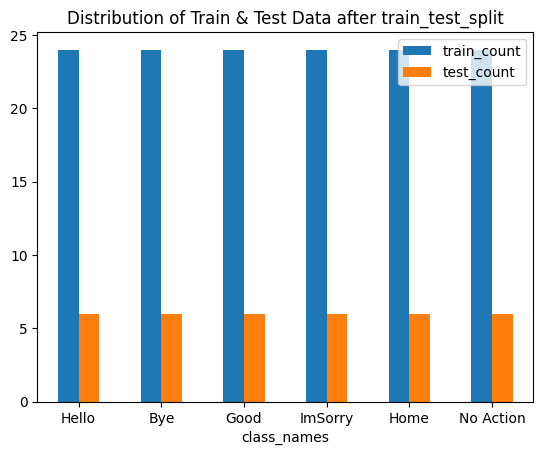

In [197]:
# Plot Distribution of Train & Test Data after train_test_split
ax = df.plot.bar(x='class_names',rot=0)
ax.set_title('Distribution of Train & Test Data after train_test_split')
ax.figure.savefig(f'{img_dir}/train_test_distribution.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/stanleysaji/Desktop/SignPose/training-notebooks/images/train_test_distribution.png'

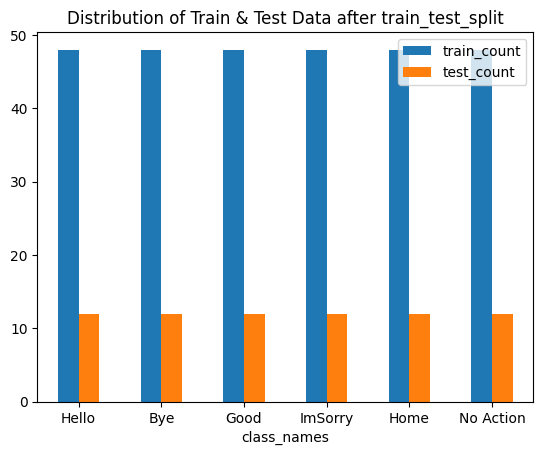

In [40]:
# Plot Distribution of Train & Test Data after train_test_split
ax = df.plot.bar(x='class_names',rot=0)
ax.set_title('Distribution of Train & Test Data after train_test_split')
ax.figure.savefig('images/train_test_distribution.png')

# 7. Training LSTM Model

In [16]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

#Set up log directory to monitor training accuracy while training
log_dir = os.path.join('Logs/{}'.format(run))
tb_callback = TensorBoard(log_dir=log_dir)

model_dir = 'Logs/{}/model'.format(run)
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


## 7.1 Build LSTM Neural Network using Keras

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [18]:
# Build LSTM Model Architecture Layers using Keras high-level # experiment 8
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258))) #each video has input shape of 30 frames of 1662 keypoints: X.shape
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu')) #next layer is a dense layer so we do not return sequences here
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

/Users/stanleysaji/Desktop/HandsOn/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
#Compile defines the loss function, the optimizer and the metrics. 
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

### View Model Summary

In [202]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 30, 64)         │        82,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,350 (927.15 KB)

 Trainable params: 237,350 (927.15 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
!pip install pydot
!pip install pydotplus
!pip install tensorflow

zsh:1: /Users/stanleysaji/Desktop/HandsOn/.venv/bin/pip: bad interpreter: /Users/stanleysaji/Desktop/SignPose/.venv/bin/python3.11: no such file or directory
  Using cached pydot-2.0.0-py3-none-any.whl.metadata (9.6 kB)
Using cached pydot-2.0.0-py3-none-any.whl (22 kB)
zsh:1: /Users/stanleysaji/Desktop/HandsOn/.venv/bin/pip: bad interpreter: /Users/stanleysaji/Desktop/SignPose/.venv/bin/python3.11: no such file or directory
  Using cached pydotplus-2.0.2-py3-none-any.whl
zsh:1: /Users/stanleysaji/Desktop/HandsOn/.venv/bin/pip: bad interpreter: /Users/stanleysaji/Desktop/SignPose/.venv/bin/python3.11: no such file or directory


In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [53]:
!pip install graphviz


In [54]:

import pydot
import pydotplus
from pydotplus import graphviz 
from tensorflow.keras.utils import plot_model 

plot_model(model, to_file=f'{img_dir}/model_plot.jpg', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## 7.2 Define Model Parameters and Train Model

In [203]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - categorical_accuracy: 0.2664 - loss: 1.7735
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.4734 - loss: 1.2952
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.6296 - loss: 0.8582
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.7359 - loss: 0.8673
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.6229 - loss: 0.8930
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.7590 - loss: 0.7300
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.7128 - loss: 0.6584
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.7731 - loss: 0.5168
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.7990 - loss: 0.4537
Epoch 10/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.8131 - loss: 0.3113
Epoch 11/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0

KeyboardInterrupt: 

In [119]:
epochs = 500
#checkpoint_dir = f"Logs/{run}/tmp/checkpoint"
model_filename = "Epoch-{epoch:02d}-Loss-{val_loss:.2f}.weights.h5"
checkpoint_filepath = os.path.join('model/',model_filename)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=f'Logs/{run}/'+checkpoint_filepath,
    monitor='val_loss', #get the minimum validation loss
    mode='min',
    save_weights_only=True,
    save_best_only=True,
    verbose=2)

# Reference: https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd
early_stopping =EarlyStopping(monitor='val_loss', patience=20,mode='auto',verbose=2)

In [120]:
# Reference: https://www.tensorflow.org/guide/keras/train_and_evaluate
print(f"Fit model on training data for {epochs} epochs")
history = model.fit(
    X_train, y_train, 
    #batch_size=64,
    epochs=epochs,
    # We pass some validation data for monitoring validation loss and metrics at the end of each epoch
    validation_data=(X_test, y_test),
    verbose=2,
    batch_size=32,
    callbacks=[tb_callback, model_checkpoint_callback, early_stopping]
)

#https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

Fit model on training data for 500 epochs
Epoch 1/500

Epoch 1: val_loss improved from inf to 1.10269, saving model to Logs/run15/model/Epoch-01-Loss-1.10.weights.h5
9/9 - 7s - 727ms/step - categorical_accuracy: 0.3472 - loss: 1.5746 - val_categorical_accuracy: 0.6528 - val_loss: 1.1027
Epoch 2/500

Epoch 2: val_loss improved from 1.10269 to 0.38148, saving model to Logs/run15/model/Epoch-02-Loss-0.38.weights.h5
9/9 - 0s - 33ms/step - categorical_accuracy: 0.6736 - loss: 0.9117 - val_categorical_accuracy: 0.8194 - val_loss: 0.3815
Epoch 3/500

Epoch 3: val_loss improved from 0.38148 to 0.35096, saving model to Logs/run15/model/Epoch-03-Loss-0.35.weights.h5
9/9 - 0s - 33ms/step - categorical_accuracy: 0.7708 - loss: 0.6276 - val_categorical_accuracy: 0.8194 - val_loss: 0.3510
Epoch 4/500

Epoch 4: val_loss improved from 0.35096 to 0.33360, saving model to Logs/run15/model/Epoch-04-Loss-0.33.weights.h5
9/9 - 0s - 34ms/step - categorical_accuracy: 0.7847 - loss: 0.5638 - val_categorical_a

In [21]:
# list all data in history
print(history.history.keys())

NameError: name 'history' is not defined

In [ ]:
log_dir

'Logs/run8'

In [ ]:
#%reload_ext tensorboard

## 9. Plot Training Results

In [22]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

hist_df.to_csv(f'./Logs/{run}/history.csv',index = False)

df_hist = pd.read_csv(f'./Logs/{run}/history.csv')
hist_df

NameError: name 'history' is not defined

In [205]:
min_loss_epoch = hist_df[hist_df['loss']==min(hist_df['loss'])].index.values
min_loss = min(hist_df['loss'])
print('Index of Minimum Loss =',min_loss_epoch[0])
print('Minimum Loss =',round(min_loss,2))

Index of Minimum Loss = 49
Minimum Loss = 0.01


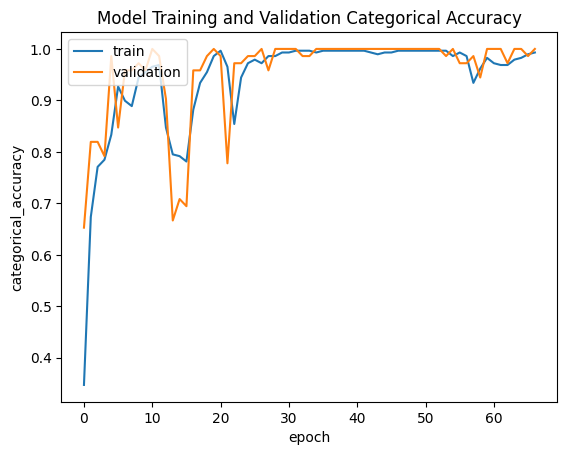

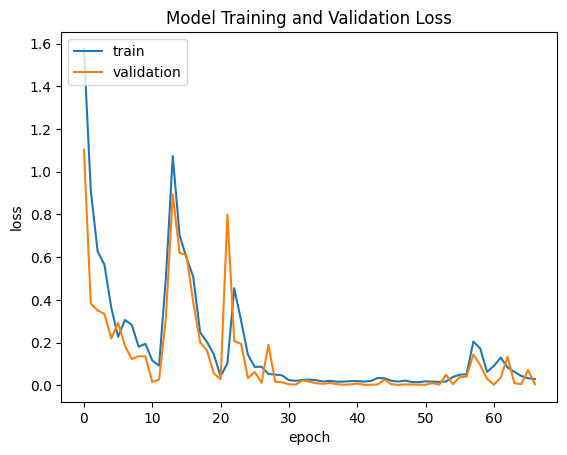

In [125]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Training and Validation Categorical Accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(f'{img_dir}/Model Training and Validation Categorical Accuracy.jpg')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(f'{img_dir}/Model Training and Validation Loss.jpg')
plt.show()

# 10. Load Best Model Weights/Checkpoint

In [7]:
# Build LSTM Model Architecture Layers using Keras high-level # run 11
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258))) #each video has input shape of 30 frames of 1662 keypoints: X.shape
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu')) #next layer is a dense layer so we do not return sequences here
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
#Compile defines the loss function, the optimizer and the metrics. 
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

NameError: name 'Sequential' is not defined

In [ ]:
# Build LSTM Model Architecture Layers using Keras high-level (First Model)
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #each video has input shape of 30 frames of 1662 keypoints: X.shape
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu')) #next layer is a dense layer so we do not return sequences here
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
#Compile defines the loss function, the optimizer and the metrics. 
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [127]:
actions = np.array(['Hello','Bye','Good','ImSorry','Home','No Action'])

In [ ]:
del model

# 11. Make Predictions on X_test

In [34]:
res = model.predict(X_test)

# Get y_predict and apply softmax function
np.argmax(res[4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


5

In [35]:
# Predicted Action
actions[np.argmax(res[3])]

'ImSorry'

In [36]:
# Actual Action
actions[np.argmax(y_test[3])]

'Home'

In [37]:
actions[y_test[1]]

array(['Bye', 'Hello', 'Hello', 'Hello', 'Hello', 'Hello'], dtype='<U9')

In [38]:
actions[np.argmax(res[2])]

'No Action'

In [39]:
actions[np.argmax(y_test[2])]

'Hello'

# Save Weights

In [28]:
model.save('action.h5')
model.load_weights('action.h5')

In [40]:
model.load_weights('action.h5')

# 12. Model Evaluation (Categorical Accuracy and Confusion Matrix)

Running these cells converts the predicition from their one-hot encoded representation to a categorical label e.g. 0,1 or 2 as opoosed to [1,0,0], [0,1,0] or [0,0,1].

In [41]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [42]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [43]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 2]],

       [[7, 0],
        [0, 2]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[7, 0],
        [0, 2]],

       [[8, 0],
        [0, 1]]])

In [53]:
accuracy_score(ytrue, yhat)

1.0

In [58]:
pip install numpy tensorflow scikit-learn matplotlib pillow


Note: you may need to restart the kernel to use updated packages.


In [64]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image

# Calculate Precision, Recall, and F1 Score
precision = precision_score(X_train, X_test, average='macro')
recall = recall_score(X_train, X_test, average='macro')
f1 = f1_score(X_train, X_test, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
report = classification_report(X_train, X_test)
print(report)

def save_classification_report_as_image(report, image_path):
    # Create a plot with the report
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    # Set font size for the text
    plt.text(0.01, 1.0, report, {'fontsize': 12}, fontproperties='monospace', va='top')
    
    # Save the plot as a temporary PNG file
    temp_image_path = 'temp_report.png'
    plt.savefig(temp_image_path, bbox_inches='tight', pad_inches=0.1, format='png')
    plt.close()

    # Convert the PNG to JPG
    with Image.open(temp_image_path) as img:
        img = img.convert('RGB')
        img.save(image_path, 'JPEG')

# Save the report
save_classification_report_as_image(report, 'classification_report.jpg')


ValueError: Found input variables with inconsistent numbers of samples: [105, 45]

In [62]:
from sklearn.metrics import classification_report
import pandas as pd



# Generate a classification report
report_dict = classification_report(ytrue, yhat, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Optionally, round the scores for better readability
report_df = report_df.round(2)

# Display the DataFrame
print(report_df)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0      2.0
1                   1.0     1.0       1.0      2.0
2                   1.0     1.0       1.0      1.0
3                   1.0     1.0       1.0      1.0
4                   1.0     1.0       1.0      2.0
5                   1.0     1.0       1.0      1.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0      9.0
weighted avg        1.0     1.0       1.0      9.0


In [56]:
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd



# Calculate Precision, Recall, and F1 Score
precision = precision_score(ytrue, yhat, average='macro')
recall = recall_score(ytrue, yhat, average='macro')
f1 = f1_score(ytrue, yhat, average='macro')

# Create a DataFrame to display the results in a table
results_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision, recall, f1]
})

# Display the DataFrame
print(results_df)

      Metric  Score
0  Precision    1.0
1     Recall    1.0
2   F1 Score    1.0


In [101]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

def generate_confusion_matrix_accuracy(X,y,types):
    predictions = model.predict(X)
    y_true = np.argmax(y, axis=1)
    y_pred = np.argmax(predictions, axis=1)
    cm = confusion_matrix(y_true, y_pred)

    print(f'{types} Overall Multiclassification Accuracy Score across all classes:',round(accuracy_score(y_true, y_pred),2))

    sns.heatmap(cm, xticklabels = label_list, yticklabels = label_list, annot = True, linewidths = 0.1, fmt='d',cmap='Blues') # cmap = 'YlGnBu')
    plt.title(f"{types} Confusion matrix", fontsize = 15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
generate_confusion_matrix_accuracy(X_train,y_train,'Train')

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Train Overall Multiclassification Accuracy Score across all classes: 0.84


NameError: name 'label_list' is not defined

In [98]:
generate_confusion_matrix_accuracy(X_test,y_test,'Test')

NameError: name 'generate_confusion_matrix_accuracy' is not defined